## Data Cleaning and Preprocessing ##

After getting our movie_data.csv many edits were needed. 
1. We needed to split the gross into domestic and world wide
2. We needed to format the date into a separate month and year column.
    -we needed to also separate out the random title values in the release date column.
    -decide wether to drop or append these wrong values. 
3. Change budget to an integer after stripping the dollar sign. 
4. Limit genres to 1 genre for plotting.
5. Decide wether or not to keep the budget column as only ~600 had values provided.

In [5]:
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# math and df manipulation libraries
import pandas as pd
import numpy as py
import math
import time
import re
import requests
import sys
import json
import ast

In [6]:
#Importing CSV for data, this is the data our visualizations are based on
movie_df = pd.read_csv('movie_data.csv', index_col = 0)

In [7]:
# Some calculations to be made
# first we need the release month fromt the date

movie_df['release_date'] = movie_df.release_date.astype(str)
movie_df['release_month'] = (movie_df['release_date'].apply(lambda x: x.split()[0]))
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.split()[-1])
movie_df['month_year'] = movie_df['release_month'] + ' ' + movie_df['release_year']

In [8]:
# next we need the worldwide gross and domestic gross from the dictionary keys and values of total gross 
# we made this a new column

movie_df['world_gross'] = movie_df['total_gross'].apply(lambda x: ast.literal_eval(x)['worldwide_gross'])
movie_df['domestic_gross'] = movie_df['total_gross'].apply(lambda x: ast.literal_eval(x)['domestic_gross'])

In [9]:
movie_df['budget_cost'] = movie_df.budget_cost.astype(str)
movie_df['budget_cost'] = movie_df['budget_cost'].apply(lambda x: x.replace('$', '').replace(',',''))

In [501]:
# this converted our genres to a strong so that we could index it. 
movie_df['genres'] = movie_df.genres.astype(str)

In [398]:
# a preview 
movie_df.head()

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year
0,Finding Dory,"Jun 17, 2016","['Adventure', 'Animation', 'Comedy', 'Family']",PG,nan,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,2016,1028570889,486295561,Jun 2016
1,Rogue One: A Star Wars Story,"Dec 16, 2016","['Action', 'Adventure', 'Sci-Fi']",PG-13,200000000,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,2016,1056057273,532177324,Dec 2016
2,Captain America: Civil War,"May 6, 2016","['Action', 'Adventure', 'Sci-Fi']",PG-13,250000000,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,2016,1153296293,408084349,May 2016
3,The Secret Life of Pets,"Jul 8, 2016","['Adventure', 'Animation', 'Comedy', 'Family']",PG,75000000,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,2016,875457937,368384330,Jul 2016
4,The Jungle Book,"Apr 15, 2016","['Adventure', 'Drama', 'Family', 'Fantasy']",PG,175000000,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,2016,966550600,364001123,Apr 2016


In [651]:
#see the unique values of the release_month
movie_df['release_month'].unique()

array(['Jun', 'Dec', 'May', 'Jul', 'Apr', 'Feb', 'Mar', 'Aug', 'Nov',
       'Jan', 'Sep', 'Oct'], dtype=object)

In [425]:
#below are all the wrong values that had dates we did want to keep. 

#(movie_df[movie_df['release_date'] == 'Kalyana']) = 'September 1, 2017' 
#(movie_df[movie_df['release_month'] == 'Rocky']) #May 5 2017
#(movie_df[movie_df['release_month'] == 'Psycho']) #October 13, 2017
#(movie_df[movie_df['release_month'] == 'Live']) # Nov 2, 2018
#(movie_df[movie_df['release_month'] == 'Mamma']) #Jul 20, 2018
#(movie_df[movie_df['release_month'] == 'The']) #Nov 8, 2019 doubled delete 3752, The Jesus Rolls Feb 28, 2020
#(movie_df[movie_df['release_month'] == 'Gigi']) #Jun 29, 2018
#(movie_df[movie_df['release_month'] == 'Jumanji']) #December 20, 2017
#(movie_df[movie_df['release_month'] == 'Harold']) #September 7, 2018
#(movie_df[movie_df['release_month'] == 'Avengers:']) # Avengers Endgame Apr 26, 2019 and Spider Man Far from Home Jul 2, 2019
#(movie_df[movie_df['release_month'] == 'nan']) #Feb 25, 2013






,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year


In [433]:
# I appended all of these manually with data from the original scrape site of Box office Mojo
#(movie_df[movie_df['release_month'] == 'Rocky']) #May 5 2017
#movie_df.loc[1205, 'release_date'] = 'May 5, 2017'

In [434]:
#movie_df.loc[1205]

title                                                         Chuck
release_date                                            May 5, 2017
genres                              ['Biography', 'Drama', 'Sport']
mpaa                                                              R
budget_cost                                                     nan
total_gross       {'domestic_gross': 320725, 'worldwide_gross': ...
runtime                                                 1 hr 38 min
release_month                                                 Rocky
release_year                                                  Rocky
world_gross                                                  502518
domestic_gross                                               320725
month_year                                              Rocky Rocky
Name: 1205, dtype: object

In [437]:
#(movie_df[movie_df['release_month'] == 'Psycho']) #October 13, 2017
#movie_df.loc[1391, 'release_date'] = 'October 13, 2017'

In [438]:
#movie_df.loc[1391]

title                               78/52: Hitchcock's Shower Scene
release_date                                       October 13, 2017
genres                                              ['Documentary']
mpaa                                                            NaN
budget_cost                                                     nan
total_gross       {'domestic_gross': 37664, 'worldwide_gross': 4...
runtime                                                 1 hr 31 min
release_month                                                Psycho
release_year                                                 Psycho
world_gross                                                   46838
domestic_gross                                                37664
month_year                                            Psycho Psycho
Name: 1391, dtype: object

In [440]:
#changed date and deleted repeated data
#(movie_df[movie_df['release_month'] == 'Live']) # Nov 2, 2018
#movie_df.loc[1721, 'release_date'] = 'November 2, 2018'
#movie_df.drop(2788, axis = 0, inplace = True)

In [441]:
#movie_df.loc[1721]

title                                             Bohemian Rhapsody
release_date                                       November 2, 2018
genres                              ['Biography', 'Drama', 'Music']
mpaa                                                          PG-13
budget_cost                                                52000000
total_gross       {'domestic_gross': 216428042, 'worldwide_gross...
runtime                                                 2 hr 14 min
release_month                                                  Live
release_year                                                    Aid
world_gross                                               903655259
domestic_gross                                            216428042
month_year                                                 Live Aid
Name: 1721, dtype: object

In [445]:
#(movie_df[movie_df['release_month'] == 'Mamma']) #Jul 20, 2018
#movie_df.loc[1732, 'release_date'] = 'July 20, 2018'


,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year
1732,Mamma Mia! Here We Go Again,Mamma Mia!,"['Comedy', 'Musical', 'Romance']",PG-13,75000000,"{'domestic_gross': 120634935, 'worldwide_gross...",1 hr 54 min,Mamma,Mia!,395044706,120634935,Mamma Mia!


In [446]:
#movie_df.loc[1732]

title                                   Mamma Mia! Here We Go Again
release_date                                             Mamma Mia!
genres                             ['Comedy', 'Musical', 'Romance']
mpaa                                                          PG-13
budget_cost                                                75000000
total_gross       {'domestic_gross': 120634935, 'worldwide_gross...
runtime                                                 1 hr 54 min
release_month                                                 Mamma
release_year                                                   Mia!
world_gross                                               395044706
domestic_gross                                            120634935
month_year                                               Mamma Mia!
Name: 1732, dtype: object

In [497]:
#(movie_df[movie_df['release_month'] == 'Gigi']) #Jun 29, 2018
#(movie_df[movie_df['release_month'] == 'Jumanji']) #December 20, 2017
#(movie_df[movie_df['release_month'] == 'Harold']) #September 7, 2018
#(movie_df[movie_df['release_month'] == 'Avengers:']) # Avengers Endgame Apr 26, 2019 and Spider Man Far from Home Jul 2, 2019
#(movie_df[movie_df['release_month'] == 'nan']) #Feb 25, 2013




,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year
3818,Circles,"August 23, 2018","['Documentary', 'Drama']",NaN,nan,"{'domestic_gross': 10260, 'worldwide_gross': 1...",1 hr 22 min,nan,nan,10260,10260,nan nan


In [466]:
#we re-ran this code from the start to reformat all the dates that we appended into the year and month columns
(movie_df[movie_df['release_month'] == 'Gigi']) #Jun 29, 2018
movie_df.loc[2252, 'release_date'] = 'June 29, 2018'

In [469]:
(movie_df[movie_df['release_month'] == 'Jumanji']) #December 20, 2017
movie_df.loc[2362, 'release_date'] = 'December 20, 2017'



In [472]:
(movie_df[movie_df['release_month'] == 'Harold']) #September 7, 2018
movie_df.loc[2363, 'release_date'] = 'September 7, 2018'

In [475]:
(movie_df[movie_df['release_month'] == 'Avengers:']) # Avengers Endgame Apr 26, 2019 and Spider Man Far from Home Jul 2, 2019
movie_df.loc[2701, 'release_date'] = 'April 26, 2019'
movie_df.loc[2707, 'release_date'] = 'July 2, 2019'


In [477]:
movie_df.loc[2707]

title                                     Spider-Man: Far from Home
release_date                                           July 2, 2019
genres                            ['Action', 'Adventure', 'Sci-Fi']
mpaa                                                          PG-13
budget_cost                                               160000000
total_gross       {'domestic_gross': 390532085, 'worldwide_gross...
runtime                                                  2 hr 9 min
release_month                                             Avengers:
release_year                                                Endgame
world_gross                                              1131927996
domestic_gross                                            390532085
month_year                                        Avengers: Endgame
Name: 2707, dtype: object

In [479]:
(movie_df[movie_df['release_month'] == 'nan']) #Aug 23 2018
movie_df.loc[3818, 'release_date'] = 'August 23, 2018'

In [480]:
movie_df.loc[3818]

title                                                       Circles
release_date                                        August 23, 2018
genres                                     ['Documentary', 'Drama']
mpaa                                                            NaN
budget_cost                                                     nan
total_gross       {'domestic_gross': 10260, 'worldwide_gross': 1...
runtime                                                 1 hr 22 min
release_month                                                   nan
release_year                                                    nan
world_gross                                                   10260
domestic_gross                                                10260
month_year                                                  nan nan
Name: 3818, dtype: object

In [481]:
(movie_df[movie_df['release_month'] == 'The'])
#Nov 8, 2019 doubled delete 3752, The Jesus Rolls Feb 28, 2020

movie_df.loc[3787, 'release_date'] = 'February 28, 2020'
movie_df.loc[2778, 'release_date'] = 'November 8, 2019'



In [482]:
(movie_df[movie_df['release_month'] == 'The'])

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year
2778,Doctor Sleep,"November 8, 2019","['Drama', 'Fantasy', 'Horror', 'Thriller']",R,45000000,"{'domestic_gross': 31581712, 'worldwide_gross'...",2 hr 32 min,The,Shining,72381712,31581712,The Shining
3787,The Jesus Rolls,"February 28, 2020","['Comedy', 'Crime', 'Drama', 'Romance']",R,nan,"{'domestic_gross': 18169, 'worldwide_gross': 6...",1 hr 25 min,The,Lebowski,64648,18169,The Lebowski


In [515]:
#checking every movie to ensure the release date is correct 
movie_df.loc[2778]

title                                                  Doctor Sleep
release_date                                       November 8, 2019
genres                   ['Drama', 'Fantasy', 'Horror', 'Thriller']
mpaa                                                              R
budget_cost                                                45000000
total_gross       {'domestic_gross': 31581712, 'worldwide_gross'...
runtime                                                 2 hr 32 min
release_month                                              November
release_year                                                   2019
world_gross                                                72381712
domestic_gross                                             31581712
month_year                                            November 2019
Name: 2778, dtype: object

In [517]:
#display(movie_df[movie_df['release_month'] == 'Sailor'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Harry'].index) #delte
#display(movie_df[movie_df['release_month'] == 'Star'].index) #delete
#display(movie_df[movie_df['release_month'] == 'An'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Marius'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Mickey'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Wrath'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Dragon'].index)#delete
#display(movie_df[movie_df['release_month'] == 'A'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Raiders'].index) #delete
#display(movie_df[movie_df['release_month'] == '60'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Friends'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Logopolis:'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Tiger'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Doctor'].index) #delete

#index_numbers = [2098, 231, 465, 707, 3054, 1038, 839, 1423, 
                 #2033, 2048, 2489, 3653, 478, 3087, 3115, 3143, 3194, 3497, 3702]

#movie_df.drop(index_numbers, axis = 0, inplace = True)
   
    

In [529]:
display(movie_df[movie_df['release_month'] == 'Mickey'])

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year
1197,Disney Junior HalloVeen Party!,Mickey Mouse Mixed-Up Adventures,[],NaN,nan,"{'domestic_gross': 359745, 'worldwide_gross': ...",46 min,Mickey,Adventures,359745,359745,Mickey Adventures


In [530]:
movie_df.drop(1197, axis = 0, inplace = True)

In [533]:
display(movie_df[movie_df['release_month'] == 'Mamma'])
movie_df.loc[1732, 'release_date'] = 'July 18, 2018'

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year
1732,Mamma Mia! Here We Go Again,Mamma Mia!,"['Comedy', 'Musical', 'Romance']",PG-13,75000000,"{'domestic_gross': 120634935, 'worldwide_gross...",1 hr 54 min,Mamma,Mia!,395044706,120634935,Mamma Mia!


In [534]:
movie_df.loc[1732]

title                                   Mamma Mia! Here We Go Again
release_date                                          July 18, 2018
genres                             ['Comedy', 'Musical', 'Romance']
mpaa                                                          PG-13
budget_cost                                                75000000
total_gross       {'domestic_gross': 120634935, 'worldwide_gross...
runtime                                                 1 hr 54 min
release_month                                                 Mamma
release_year                                                   Mia!
world_gross                                               395044706
domestic_gross                                            120634935
month_year                                               Mamma Mia!
Name: 1732, dtype: object

dict

In [540]:
#re applied again for a couple more 
movie_df['release_date'] = movie_df.release_date.astype(str)
movie_df['release_month'] = (movie_df['release_date'].apply(lambda x: x[0:3])) #x.split() 
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.split()[-1])
movie_df['month_year'] = movie_df['release_month'] + ' ' + movie_df['release_year']

In [541]:
movie_df.loc[1732]

title                                   Mamma Mia! Here We Go Again
release_date                                          July 18, 2018
genres                             ['Comedy', 'Musical', 'Romance']
mpaa                                                          PG-13
budget_cost                                                75000000
total_gross       {'domestic_gross': 120634935, 'worldwide_gross...
runtime                                                 1 hr 54 min
release_month                                                   Jul
release_year                                                   2018
world_gross                                               395044706
domestic_gross                                            120634935
month_year                                                 Jul 2018
Name: 1732, dtype: object

In [544]:
#movie_final[movie_final['release_date'] == 'September 1, 2017']
#movie_final.drop(1148, axis = 0, inplace = True)

In [548]:
#succesfully have 12 months
#movie_df['release_month'].unique()

array(['Jun', 'Dec', 'May', 'Jul', 'Apr', 'Feb', 'Mar', 'Aug', 'Nov',
       'Jan', 'Sep', 'Oct'], dtype=object)

In [550]:
#made a copy 
movie_final = movie_df.copy()


In [552]:
#one outlier was proving difficult 
movie_df[movie_df['release_date'] == 'September 1, 2017']

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year
1148,"September 1, 2017","September 1, 2017","September 1, 2017","September 1, 2017",September 1 2017,"September 1, 2017","September 1, 2017",Sep,2017,"September 1, 2017","September 1, 2017",Sep 2017


In [553]:
#dropped it
movie_df.drop(1148, axis = 0, inplace = True)

In [554]:
#remade copy 
movie_final = movie_df.copy()

movie_df['domestic_gross'] = movie_df['total_gross'].apply(lambda x: ast.literal_eval(x)['domestic_gross'])

In [579]:
genre = ast.literal_eval(movie_df.genres[0])

In [589]:
movie_df['genres'] = movie_df.genres.apply(lambda x: ast.literal_eval(x))

In [639]:
movie_df['genre_1'] = movie_df.genres.apply(lambda x: x[0] if len(x) > 0 else [])

In [640]:
movie_df['genre_1'] =movie_df['genre_1'].astype(str)

In [641]:
len(movie_df.genre_1.unique())

27

In [654]:
movie_df.isna().sum()

title                0
release_date         0
genres               0
mpaa              2049
budget_cost          0
total_gross          0
runtime             43
release_month        0
release_year         0
world_gross          0
domestic_gross       0
month_year           0
genre_1              0
dtype: int64

In [655]:
movie_df.head()

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year,genre_1
0,Finding Dory,"Jun 17, 2016","[Adventure, Animation, Comedy, Family]",PG,nan,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,2016,1028570889,486295561,Jun 2016,Adventure
1,Rogue One: A Star Wars Story,"Dec 16, 2016","[Action, Adventure, Sci-Fi]",PG-13,200000000,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,2016,1056057273,532177324,Dec 2016,Action
2,Captain America: Civil War,"May 6, 2016","[Action, Adventure, Sci-Fi]",PG-13,250000000,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,2016,1153296293,408084349,May 2016,Action
3,The Secret Life of Pets,"Jul 8, 2016","[Adventure, Animation, Comedy, Family]",PG,75000000,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,2016,875457937,368384330,Jul 2016,Adventure
4,The Jungle Book,"Apr 15, 2016","[Adventure, Drama, Family, Fantasy]",PG,175000000,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,2016,966550600,364001123,Apr 2016,Adventure


In [658]:
movie_df.budget_cost[0]

str

In [660]:
movie_df.dtypes

title             object
release_date      object
genres            object
mpaa              object
budget_cost       object
total_gross       object
runtime           object
release_month     object
release_year      object
world_gross        int64
domestic_gross     int64
month_year        object
genre_1           object
dtype: object

In [662]:
movie_df.budget_cost = movie_df.budget_cost.apply(lambda x: float(x))

In [664]:
type(movie_df.budget_cost[0])

numpy.float64

In [665]:
movie_df.budget_cost.isna().sum()

3220

In [743]:
movie_df.to_csv(r'final_movie.csv')

## Beginnings of Data Visualization ##


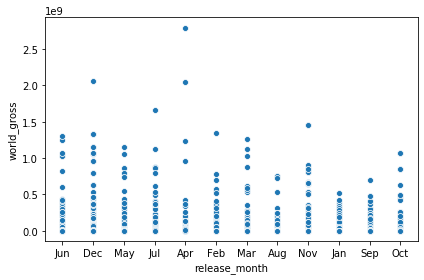

In [555]:
sns.scatterplot( x = movie_df['release_month'], y = movie_df['world_gross'], data = movie_df)
plt.tight_layout()

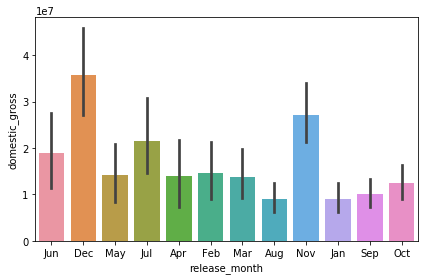

In [564]:
months = sns.barplot( x = movie_df['release_month'], y = movie_df['domestic_gross'], data = movie_df)
plt.tight_layout()
months = bar_genre.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#vertical x axis needed

## Question 3: What kind of movie has a higher return?  ##

Which genres have the higher revenues?


[Text(0, 0, 'Adventure'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Film-Noir'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Sport'),
 Text(0, 0, '[]'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Western'),
 Text(0, 0, 'Reality-TV'),
 Text(0, 0, 'News'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Adult'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Short')]

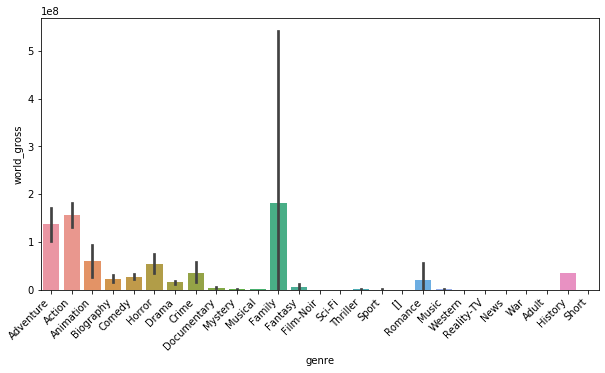

In [722]:
genre_df = movie_df.copy()
genre_df['genre'] = genre_df['genre_1']
genre_df[genre_df['genre'] == '[]'].dropna(axis = 0)

plt.figure(figsize = (10,5))
bar_genre = sns.barplot(x = genre_df['genre'], y = movie_df['world_gross'], data = movie_df)
bar_genre.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#vertical x axis needed


,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,month_year,genre_1,genre


[Text(0, 0, 'Adventure'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Film-Noir'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Sport'),
 Text(0, 0, '[]'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Western'),
 Text(0, 0, 'Reality-TV'),
 Text(0, 0, 'News'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Adult'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Short')]

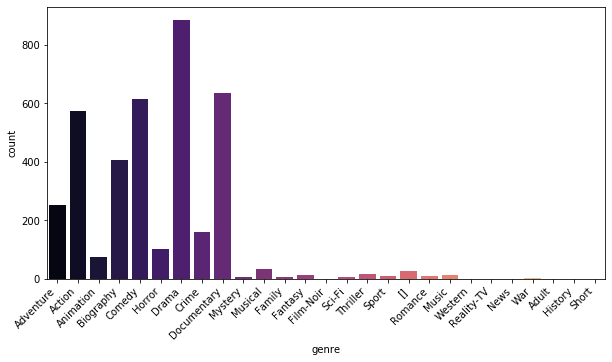

In [713]:
genre_df = movie_df.copy()
genre_df['genre'] = genre_df['genre_1']


plt.figure(figsize=(10,5))
chart = sns.countplot(
    data= genre_df,
    x= genre_df['genre'],
    palette='magma')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [4]:

sns.scatterplot(x = movie_df['genre_1'], y = movie_df['world_gross'], data = movie_df)

NameError: name 'sns' is not defined

## Question 4: How much should we budget? ##

What budget produces the highest revenue?


In [744]:
budget_df = movie_df.copy()

In [745]:
budget_df.dropna(inplace = True)

In [1]:
gross_budget = sns.barplot(x = budget_df['world_gross'], y = budget_df['budget_cost'], data = budget_df)
gross_budget.set(xticks=df.a[2::8])

NameError: name 'sns' is not defined

## Question 5: What rating we target? ##

What MPAA has the most Worldwide Gross? 

In [699]:
mpaa_df = movie_df.copy()
#mpaa_df.dropna(axis = 0, inplace = True)


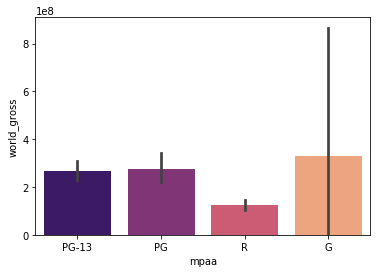

In [701]:
sns.barplot(x= mpaa_df['mpaa'], y = mpaa_df['world_gross'], data = mpaa_df, palette = 'magma')